# Session 2: Training a network w/ Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Google's Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* The basic components of a neural network
* How to use gradient descent to optimize parameters of a neural network
* How to create a neural network for performing regression

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Gradient Descent](#gradient-descent)
    - [Defining Cost](#defining-cost)
    - [Minimizing Error](#minimizing-error)
    - [Backpropagation](#backpropagation)
    - [Extra details for notebook only](#extra-details-for-notebook-only)
    - [Local Minima/Optima](#local-minimaoptima)
    - [Learning Rate](#learning-rate)
- [Creating a Neural Network](#creating-a-neural-network)
    - [Defining Cost](#defining-cost-1)
    - [Training Parameters](#training-parameters)
    - [Training vs. Testing](#training-vs-testing)
    - [Stochastic and Mini Batch Gradient Descent](#stochastic-and-mini-batch-gradient-descent)
    - [Input's Representation](#inputs-representation)
    - [Over vs. Underfitting](#over-vs-underfitting)
    - [Introducing Nonlinearities / Activation Function](#introducing-nonlinearities--activation-function)
    - [Going Deeper](#going-deeper)
- [Image Inpainting](#image-inpainting)
    - [Description](#description)
    - [Building the Network](#building-the-network)
    - [Training](#training)
- [Homework:](#homework)
- [Reading:](#reading)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

In this session we're going to take everything we've learned about Graphs, Sessions, Operations, and Tensors and use them all to form a neural network.  We're going to learn how we can use data and something called gradient descent to teach the network what the values of the parameters of this network should be.

In the last session, we saw how to normalize a dataset, using the dataset's mean and standard deviation.  While this seemed to reveal some interesting representations of our dataset, it left us with a lot more to explain.  In the case of faces, it really seemed to explain more about the background than the actual faces.  For instance, it wasn't able to describe the differences between different races, gender, expressions, hair style, hair color, or the other many various differences that one might be interested in.

What we're really interested in is letting the computer figure out what representations it needs in order to better describe the data and some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.  In this session, we're going to start to see how to do that.

Before we get into the details, I'm going to go over some background on gradient descent and the different components of a neural network.  If you're comfortable with all of this, please feel free to skip ahead.

<a name="gradient-descent"></a>
# Gradient Descent

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

Initially, all of the parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters.

Let's say we have a few images, and know that given a certain image, when I feed it through a network, its parameters should help the final output of the network be able to spit out the word "orange", or "apple", or some appropriate *label* given the image of that object.  The parameters should somehow accentuate the "orangeness" of my image.  It probably will be able to transform an image in away that it ends up having high intensities for images that have the color orange in them, and probably prefer images that have that color in a fairly round arrangement.

Rather than hand crafting all of the possible ways an orange might be manifested, we're going to learn the best way to optimize its objective: separating oranges and apples.  How can we teach a network to learn something like this?

<a name="defining-cost"></a>
## Defining Cost

Well we need to define what "best" means.  In order to do so, we need a measure of the "error".  Let's continue with the two options we've been using: orange, or apple.  I can represent these as 0 and 1 instead.

I'm going to get a few images of oranges, and apples, and one by one, feed them into a network that I've randomly initialized.  I'll then filter the image, by just multiplying every value by some random set of values.  And then I'll just add up all the numbers, and then squash the result in a way that means I'll only ever get 0 or 1.  So I put in an image, and I get out a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of oranges, and a 1 for images of apples?

We do that by saying, if the network predicts a 0 for an orange, then the error is 0.  If the network predicts a 1 for an orange, then the error is 1.  And vice-versa for apples.  If it spits out a 1 for an apple, then the error is 0.  If it spits out a 0 for an apple, then the error is 1.  What we've just done is create a function which describes error in terms of our parameters:

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true_label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted_label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

Don't worry about trying to remember this equation.  Just see how it is similar to what we've done with the oranges and apples.  `X` is generally the input to the network, which is fed to some network, or a function $f$, which we know should output some label `y`.  Whatever difference there is between what it should output, y, and what it actually outputs, $f(x)$ is what is different, or error, $E$.


<a name="minimizing-error"></a>
## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many.  Let's say 100.  This way, we can see what our network is doing on average.  If our error at the current network parameters is e.g. 50/100, we're correctly guessing about 50 of the 100 images.

Now for the crucial part.  If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear anyone number of these terms to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  That's pretty much gradient descent in a nutshell.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

<a name="backpropagation"></a>
## Backpropagation

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?

One thing I didn't mention was how we figure out what the gradient is.  In order to do that, we use something called backpropagation.  When we pass as input something to a network, it's doing what's called forward propagation.  We're sending an input and multiplying it by every weight to an expected output.  Whatever differences that output has with the output we wanted it to have, gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.  It uses something called the chain rule to find the gradient of the error with respect to every single parameter in a network, and follows this error from the output of the network, all the way back to the input.

While the details won't be necessary for this course, we will come back to it in later sessions as we learn more about how we can use both backprop and forward prop to help us understand the inner workings of deep neural networks.

If you are interested in knowing more details about backprop, I highly recommend both Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/

<a name="extra-details-for-notebook-only"></a>
## Extra details for notebook only

To think about this another way, the definition of a linear function is written like so:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself, or put another way, it outputs $x^2$.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is:

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value.

If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You might also see this process described like so:

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

That's just saying the same thing really.  We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

Before we start, we're going to need some library imports:

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

Let's say, purely for illustration, that our cost function looked like:

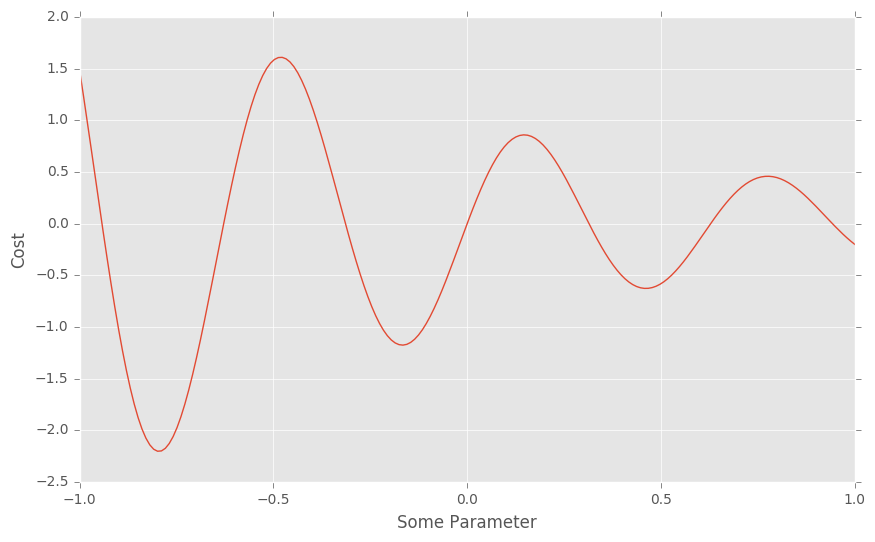

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter');

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [4]:
gradient = np.diff(cost)

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

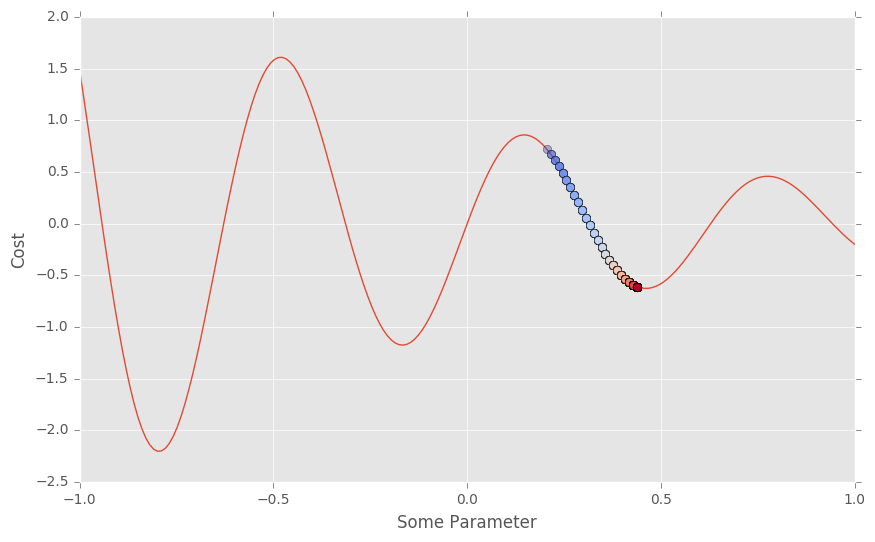

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120 # np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    # casting to int disables a DeprecationWarning:
    # using a non-integer number instead of an integer will result in an error in the future
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', 
            alpha=(iter_i + 1) / n_iterations, 
            color=scalar_map.to_rgba(iter_i));

What this would mean is depending on where our random initialization of weights began, our final cost might end up being somewhere around -0.5.  This is a local minima.  It is, based on its surroundings, a minima.  But it is not the global minima.  In fact there are a few other possible places the network could have ended up, if our initialization led us to another point first, meaning our final cost would have been different.

This illustration is just for a single parameter... but our networks will often have millions of parameters... I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

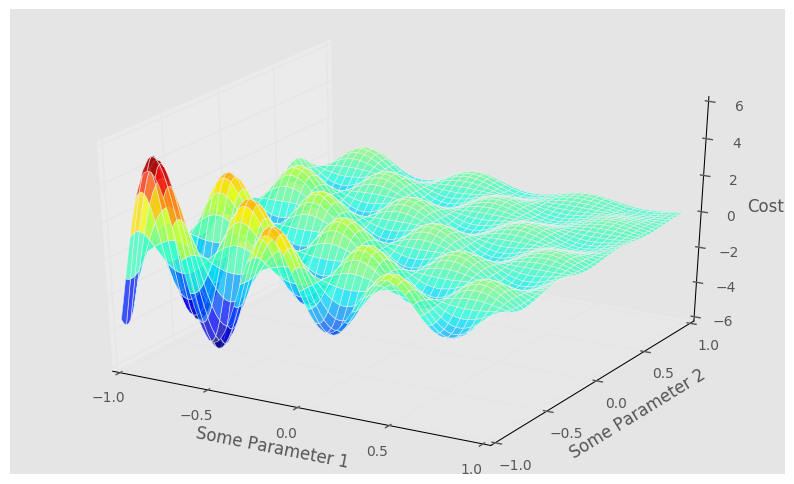

In [23]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost');
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima.  That's good news for deep networks as we'll often work with that many parameters.

<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

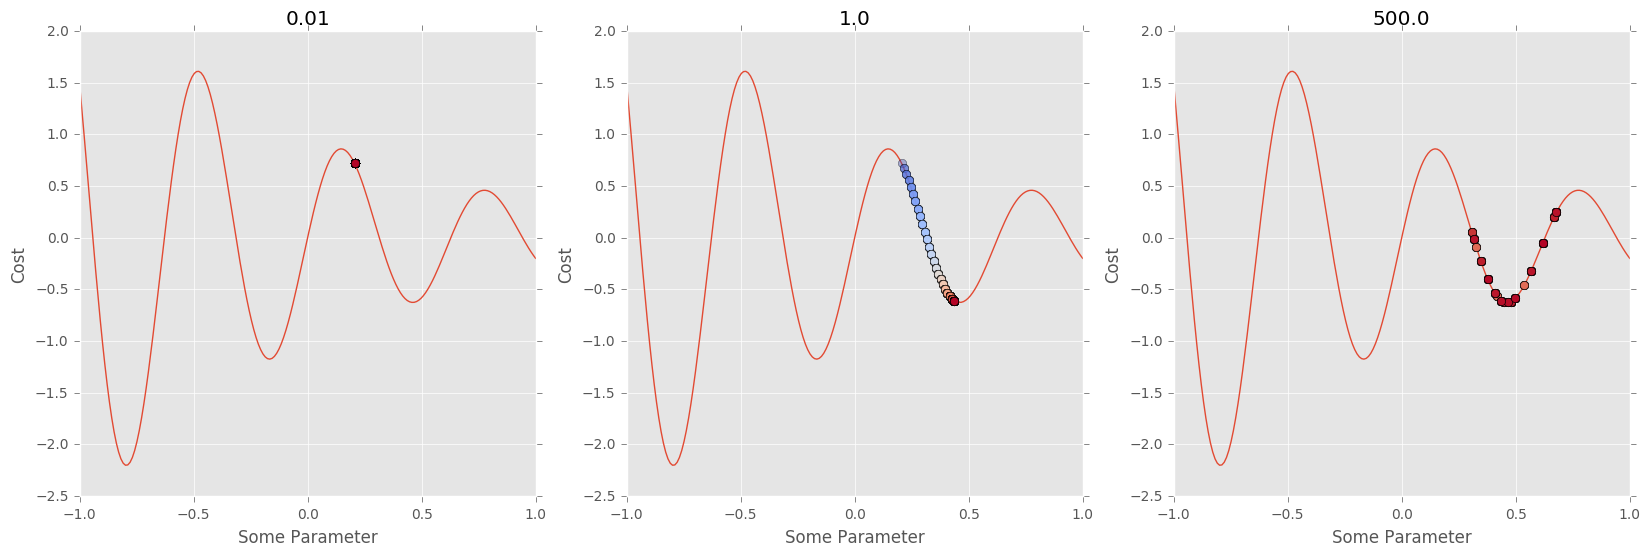

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120 # np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', 
                alpha=(iter_i + 1) / n_iterations, 
                color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

We'll learn more tricks for changing this landscape to be a bit more concave, reducing the number of local minima by regularizing the landscape through many different extensions to this same basic idea of following the negative slope of our gradient.  Before we can get into them we'll need to learn how to create a neural network.

<a name="creating-a-neural-network"></a>
# Creating a Neural Network

Let's try a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

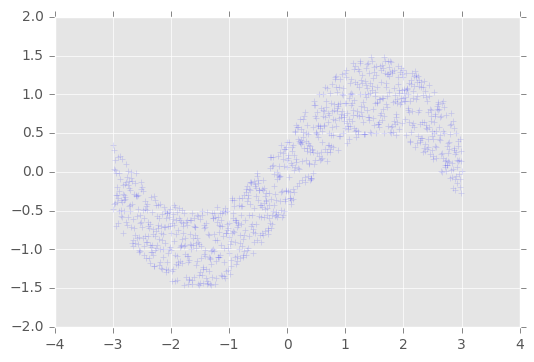

In [28]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+');

So now we can see that there is a sine wave looking thing but it's really noisy.  We want to train a network to say, given any value on the $x$ axis, tell me what the value should be on the $y$ axis.  That is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

<a name="defining-cost-1"></a>
## Defining Cost

We're going to use tensorflow to train our first network:

In [29]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

Now for parameters of our network.  We're going to transform our x values, just like we did with an image and filtering it.  In order to do that, we're going to multiply the value of x by some unknown value.  Pretty simple.  So what that lets us do is scale the value coming in.  We'll also allow for a simple shift by adding another number.  That lets us move the range of values to any new position.

But we need an initial value for our parameters.  For that, we're going to use values close to 0 using a gaussian function:

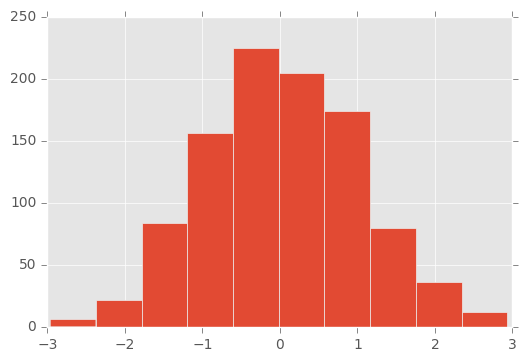

In [30]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n);

In order to do that, we can use the tensorflow `random_normal` function.  If we ask for 1000 values and then plot a histogram of the values, we can see that the values are centered around 0 and are mostly between -3 and 3.  For neural networks, we will usually want the values to start off much closer to 0.  To do that, we can control the standard deviation like so:

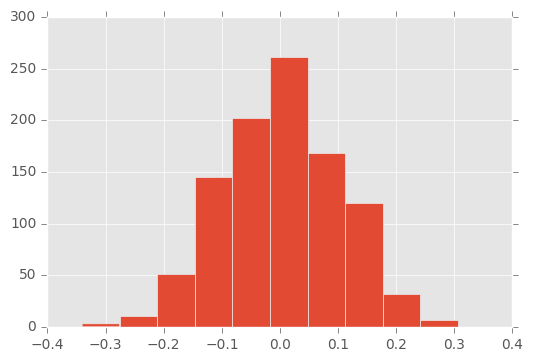

In [31]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n);

In [32]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us to define the value at the start of a run/eval.  It does need an initial value, which we'll give right now using the function tf.random_normal.  We could also pass an initializer, which is simply a function which will call the same function.  We'll see how that works a bit later.  In any case, the random_normal function just says, give me a random value from the "normal" curve.  We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

We're going to use gradient descent to learn what the best value of `W` and `b` is.  In order to do that, we need to know how to measure what the `best` is.  Let's think about that for a moment.  What is it we're trying to do?  We're trying to transform a value coming into the network, `x`, which ranges from values of -3 to 3, to match a known value, `Y`, which should be a sine wave which ranges from -1 to 1.  So any value into the network should make it seem like the network *represents* a sine wave.  Well we know what a sine wave should be.  We can just use python to calculate it for us.  We just need a function that measures distance:

In [33]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [34]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

This function is just saying, give me the distance from the predicted value to the assumed underlying sine wave value.  But let's say this was some natural occuring data in the world.  Or a more complex function, like an image of oranges or apples.  We don't know what the function is that determines whether we perceive an image as an apple or orange.

In [14]:
# cost = distance(Y_pred, ?)

But we do have a limited set of data that says what a given input *should* output.  That means we can still learn what the function might be based on the data.

So instead of our previous cost function, we'd have:

In [35]:
cost = distance(Y_pred, Y)

where `Y` is the *true* Y value.

Now it doesn't matter what the function is.  Our cost will measure the difference to the value we have for the input, and try to find the underlying function.  Lastly, we need to sum over every possible observation our network is fed as input.  That's because we don't give our network 1 `x` value at a time, but generally will give it 50-100 or more examples at a time.

In [16]:
cost = tf.reduce_mean(distance(Y_pred, Y))

<a name="training-parameters"></a>
## Training Parameters

Let's see how we can learn the parameters of this simple network using a tensorflow optimizer.

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

<TODO: Describe Train/Test sets, use test set to visualize rest of number line>

We tell the optimizer to minimize our `cost` variable which measures the distance between the prediction and actual `Y` value.  The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

We now just need to iteratively run the optimizer, just like we would run/eval any other part of our tensorflow graph.

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[  1.78842907e+01   1.86798401e+01   1.83295403e+01   1.78470707e+01
   1.85010033e+01   1.77826443e+01   1.83023663e+01   1.81343575e+01
   1.77798347e+01   1.80285397e+01   1.73025322e+01   1.76621857e+01
   1.75348339e+01   1.77005100e+01   1.75113163e+01   1.71641846e+01
   1.79749126e+01   1.72339802e+01   1.74552174e+01   1.76563663e+01
   1.75402756e+01   1.78077602e+01   1.72042141e+01   1.69598598e+01
   1.70026016e+01   1.70599384e+01   1.68357315e+01   1.75451717e+01
   1.70519371e+01   1.71345921e+01   1.64747105e+01   1.69278107e+01
   1.68317947e+01   1.66544838e+01   1.69718609e+01   1.67393608e+01
   1.67269306e+01   1.63659973e+01   1.68477936e+01   1.70432663e+01
   1.68387756e+01   1.61785450e+01   1.68353424e+01   1.62093601e+01
   1.65873127e+01   1.62782001e+01   1.65675373e+01   1.64403954e+01
   1.61041241e+01   1.63360577e+01   1.61151695e+01   1.57824640e+01
   1.64632969e+01   1.63490372e+01   1.54768906e+01   1.62398071e+01
   1.59009056e+01   1.53964825e+01

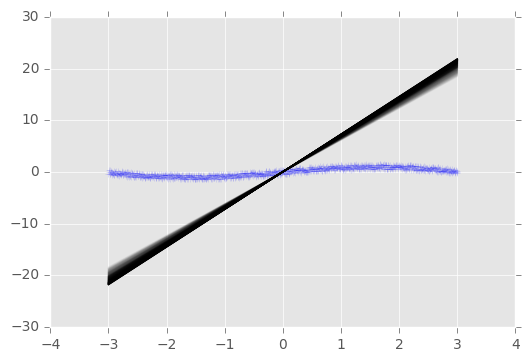

In [62]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            if it_i % 1000 == 0:
                print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if (np.abs(prev_training_cost - training_cost) < 0.000001).all():
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

After running the code, we should see our original noisy data.  We call that the training data since it is training the network.  And we see the output of the network as a solid black line.

Now you might be thinking, wait, that looks like nothing like a sine wave... I mean it has got the general trend of the line I guess.  But it doesn't curve at all!  We're going to get into why that is in a moment.

But first, we're going to have to learn a bit more about the different between training and testing networks.

<a name="training-vs-testing"></a>
## Training vs. Testing

<TODO:>

<a name="stochastic-and-mini-batch-gradient-descent"></a>
## Stochastic and Mini Batch Gradient Descent

Now remember when I said our cost manifold would have many local minima, and that we'd learn some tricks to help us find the best one?  Well now we're ready to talk about two ways of helping with that.  One is using what are called mini-batches.  This is useful for a number of reasons.  First, it is generally impractical to look at an entire dataset.  You might have millions of images which you couldn't ever try loading all at once into a network.  Instead you would look at some random subset of them.  Second, we avoid trying to generalize our entire dataset, allowing us to navigate through more fine grained terrain.  In order to use mini batches, we simply iterate through our entire dataset, `batch_size` at a time:

In [54]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


It turns out that this is not the best idea, because we're always looking at the same order of our dataset.  Neural networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  In some cases, it may turn out to be exactly what we want to do.  For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.  Then we will have to make sure we're sending data in a certain order.  But for now, we really want to avoid using any order.

So we'll have to randomly permute the indexes of our dataset like so:

In [55]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[43 94 77 72 25 35 20  2 59 37]
[88 93 41 95 15 40 48 19  3 82]
[80 75 10 28 45 50 24 38  8 47]
[33 99 29  6 63  9 65 98 66 97]
[92 90  5 74 44 55 57 91 13 76]
[81 71 27 67 12 61 53 89 62 52]
[34 31 60 39 87 26 23 22 46 79]
[18 49  0 78  4 32 51 58 21 70]
[36 86 42 56 85  7 83 73  1 64]
[54 84 96 14 11 17 69 68 16 30]


What we've done above is look at a range of 100 possible indexes by chunking them into `batch_size` at a time.  But we've also randomized the order we've looked at them so that we aren't prioritizing learning one part of a dataset over another.

We can implement this into our previous code like so:

[  4.22767677e+01   4.30233269e+01   4.26240311e+01   4.20925674e+01
   4.26975060e+01   4.19301567e+01   4.24008789e+01   4.21838799e+01
   4.17803612e+01   4.19800720e+01   4.12050705e+01   4.15157280e+01
   4.13393860e+01   4.14560661e+01   4.12178802e+01   4.08217545e+01
   4.15834885e+01   4.07935600e+01   4.09658051e+01   4.11179619e+01
   4.09528770e+01   4.11713638e+01   4.05188255e+01   4.02254791e+01
   4.02192230e+01   4.02275658e+01   3.99543686e+01   4.06148148e+01
   4.00725861e+01   4.01062469e+01   3.93973694e+01   3.98014755e+01
   3.96564636e+01   3.94301643e+01   3.96985397e+01   3.94170532e+01
   3.93556252e+01   3.89456978e+01   3.93784981e+01   3.95249786e+01
   3.92714920e+01   3.85622711e+01   3.91700745e+01   3.84950943e+01
   3.88240547e+01   3.84659462e+01   3.87062950e+01   3.85301552e+01
   3.81448936e+01   3.83278313e+01   3.80579529e+01   3.76762505e+01
   3.83080902e+01   3.81448326e+01   3.72236977e+01   3.79376144e+01
   3.75497246e+01   3.69963036e+01

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


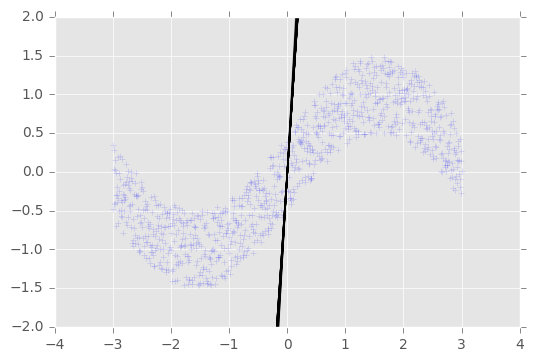

In [63]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            if it_i % 1000 == 0:
                print(training_cost)
fig.show()
plt.draw()

The resulting process is also know as Mini-Batch Gradient Descent, since we are taking smaller batches of our data and performing gradient descent.  Further, it is Stochastic, meaning the order of the data presented is randomized, and is also commonly referred to as Stochastic Gradient Descent.  When the two ideas are combined, we have the best of both worlds: the mini batch part which allows us to get more stable updates; and the stochastic part which allows us to move to different parts of our cost's manifold entirely.  I'll just use Gradient Descent as we'll always want it to be in batches, and to be the stochastic kind.

Let's stick all of the code necessary for training into a function so we don't have to type it out again:

In [81]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    # fig.show() # not needed in non-GUI mode
    plt.draw()

To get closer to a sine wave, we're going to have to be able to do more than simply scale our input with a multiplication!  What if we had a lot more parameters?  What if we have 10 different multiplications of the input?  What does your intuition tell you?  How are 10 more multiplications combined?  1000?  A million?

<QUIZ>

Would we be able to find a good representation then?  Let's try and see how we might do that:

3.54778
3.16803
3.39748
2.35713
3.48719
1.48013
3.53051
2.85042
3.45533
1.9935


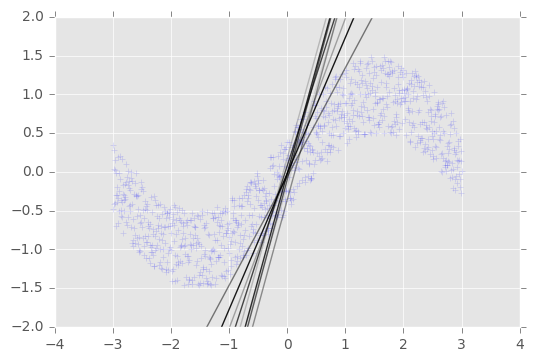

In [84]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

First, the training takes a lot longer!  That's because our network is much larger.  By adding 100 neurons, we've added 100 more multiplications, and 100 more additions for every observation.  Since we have 10000 observations, that's $(100 + 100) * 10000$ more computations just for computing the output, or 100 million more computations.  But that's not all.  We also need to compute the gradients of every parameter!  Having all of these extra parameters makes it much harder to find the best solution.  So as our network expands, the amount of memory and computation will grow very fast, and training becomes more difficult.

Despite increasing everything about our network, looking at the cost, we're not doing much better!  Why is that?  Well, we've added a lot more multiplications.  But it hasn't changed the fact that our function is still just a linear function.  Multiplying a millions times wouldn't help but instead just make it harder to find the same solution we found with far less parameters.  But also, the cost is going up and down, instead of just down.  That's a good sign that we should probably reduce the learning rate.

<a name="inputs-representation"></a>
## Input's Representation

In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

<a name="over-vs-underfitting"></a>
## Over vs. Underfitting

One technique for representing curved data like a sine wave is to consider the different polynomials of your input.

0.571104
0.411872
0.411575
0.411576
0.411575
0.411575
0.411576
0.411578
0.411577
0.411571


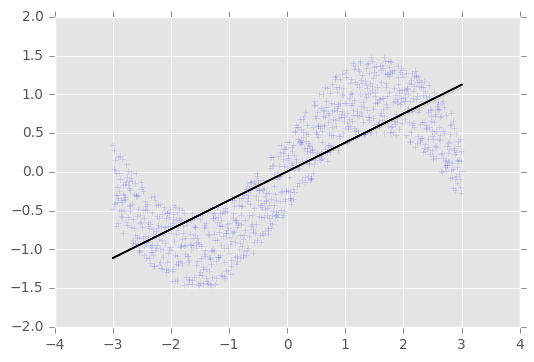

In [85]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

If we use the 0th and 1st expansion, that is $x^0$, which just equals 1, and $x^1$.  So $1 * W_1 + x * W_2$.  That's exactly the same as what we've just done.  It starts to get interesting once we add more powers:

0.91953
0.685912
0.797891
0.627949
0.408838
0.61268
0.585734
0.615281
0.388179
0.357918


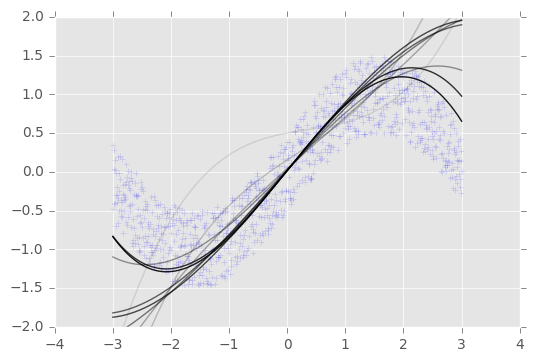

In [87]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

But we really don't want to add *too many* powers.  If we add just 1 more power:

1.26899
3.71115
1.93218
4.19181
3.4035
4.04215
3.81369
3.42482
4.07018
1.38736


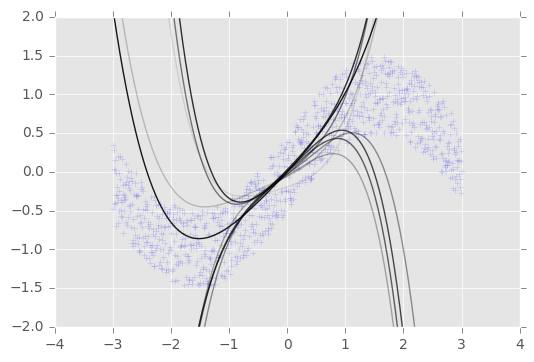

In [89]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

The whole thing is completely off.  In general, a polynomial expansion is hardly ever useful as it requires us to know what the underlying function is, meaning, what order polynomial is it?

<a name="introducing-nonlinearities--activation-function"></a>
## Introducing Nonlinearities / Activation Function

How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is a really essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course:

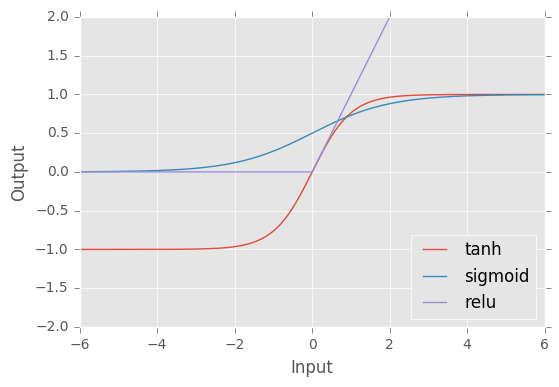

In [90]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

What each of these curves demonstrates is how instead of just multiplying an input by a number, creating another line, we *non*-linearly multiply the input value.  That just means we will multiply our input by a different value depending on what the input value is.  This allows us to express very complex ideas.  If we do this enough times, we can express anything.  Let's see how we can do this

3.54551
0.290135
0.277552
0.272258
0.26963
0.26687
0.265637
0.265022
0.264235
0.264824


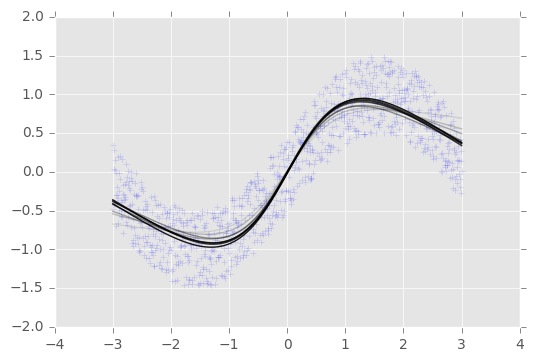

In [91]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<TODO: Graphic of fully connected network, matrix>

It turns out that multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.  It's often called a fully-connected network, since everything is connected to everything else, meaning every neuron is multiplied by every single input value.  This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.

You might have seen this depicted like so:


<a name="going-deeper"></a>
## Going Deeper

Let's write a simply function for creating the same type of network as above:

In [98]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's now take a look at what the tensorflow graph looks like when we create this type of connection:

In [99]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful.  We can actually do a much better job here by creating our variables within *scopes*:

In [100]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer.  This initializer will create a new random value every time we call `sess.run(tf.global_variables_initializer())`.  We also pass some more sensible values for the initial mean and standard deviation.

Now let's look at the graph:

In [101]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

We can see that everything that is part of creating a linear connection is under the scoped tag we have given it.

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [102]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

<TODO: Also, we can visualize our network using Tensorboard...>

<a name="image-inpainting"></a>
# Image Inpainting

<a name="description"></a>
## Description

Now we've got most of the tools we'll need to perform much more complicated tasks.  We'll first explore a fun application: painting an image.  This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has done in his online demonstration of "image inpainting".  Let's first get an image that we'll try to teach a neural network to paint.

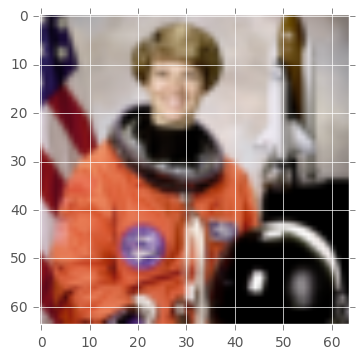

In [92]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img);

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [103]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.

We can get our original image back by reshaping the colors back into the original image shape:

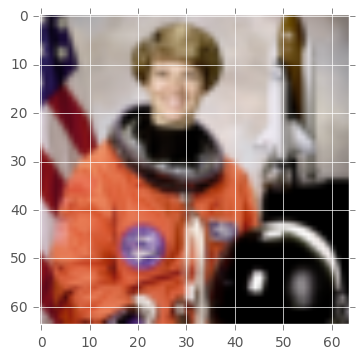

In [104]:
plt.imshow(ys.reshape(img.shape));

Remember before, we were using regression to input to our network `X = x`, and output `Y = y`.  The only thing that is changing here is the number of values in our input and output, and what they represent to us.  But Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition.  We'll stick with the convention of using the variable `X` to denote the input to the network, and `Y` to denote the output of the network.

In [105]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

<a name="building-the-network"></a>
## Building the Network

For our model, we'll make our first deep neural network!  Instead of having a single fully connected layer, we'll have many layers.  We'll make use of a for loop to simplify the creation of the network. The network will look like:

<TODO: wacom/motion-graphic>

In [106]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The rest of this code is pretty much the same as what we've done in previous networks.  We setup our cost.  Except before, we only ever had 1 feature.  In this network, our output is 3 vaules, `r`, `g`, `b`.

<a name="training"></a>
## Training

In order to better measure the error, we'll sum the error across all 3 values.  There are many ways we could have approached this which we'll get into in later sessions.

In [107]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called `AdamOptimizer` which in general will work better than the original `GradientDescentOptimizer`.  It's pretty similar, except it has some tricks to help with gradient descent.  Getting into the details of it is beyond the scope of what we have time for.  So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [108]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The rest of the code is pretty much the same.  We create the optimizer exactly the same way, by giving it our cost.  And then create a session to iterate over chunks of our training data.  Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, `Y_pred`, and giving it every location in the image to predict, the `xs` array.  This will return us the predicted color values for those locations.  This process will take awhile!

0 173.073
1 164.599
2 158.789
3 152.51
4 148.157
5 144.092
6 139.76
7 135.754
8 133.509
9 132.355
10 129.93
11 131.393
12 128.465
13 124.679
14 117.164
15 115.228
16 118.254
17 112.601
18 110.13
19 111.553


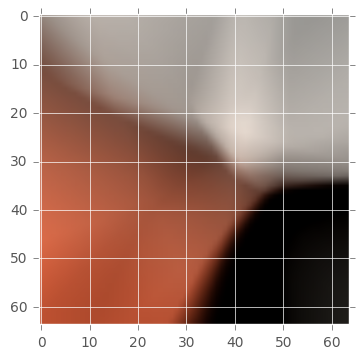

20 114.603
21 107.064
22 106.632
23 107.437
24 104.429
25 103.109
26 105.562
27 103.221
28 101.567
29 98.6778
30 104.238
31 99.105
32 95.964
33 95.8057
34 104.627
35 98.3909
36 95.1665
37 94.95
38 97.3111
39 93.5038


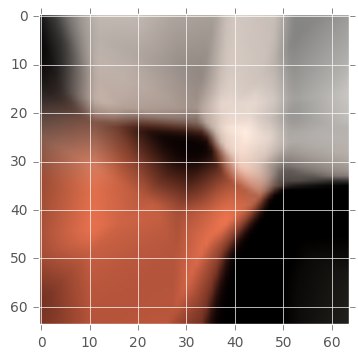

40 93.8946
41 93.5036
42 94.8734
43 93.2107
44 93.3544
45 96.3612
46 92.7724
47 90.4081
48 91.6277
49 92.4231
50 90.4358
51 90.6452
52 90.4205
53 90.126
54 90.199
55 89.5882
56 90.1562
57 89.3578
58 94.6988
59 90.0259


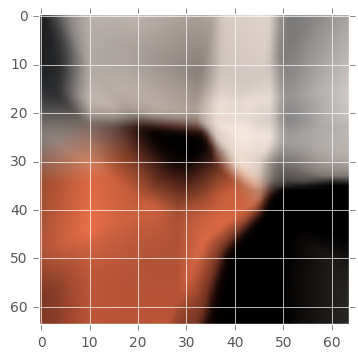

60 89.1499
61 87.8878
62 87.9272
63 93.6183
64 89.2183
65 88.0307
66 89.1536
67 86.9132
68 88.2834
69 91.3041
70 87.5283
71 87.3974
72 86.2174
73 86.476
74 86.6145
75 85.9019
76 86.1101
77 86.4422
78 86.5339
79 84.0547


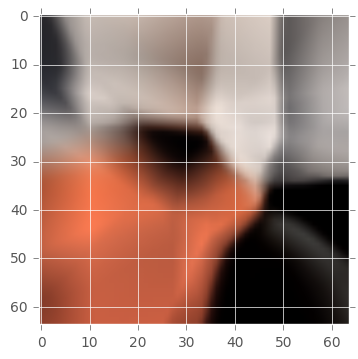

80 88.7097
81 89.4058
82 84.8326
83 88.1612
84 84.8864
85 84.3341
86 82.3951
87 83.539
88 82.862
89 83.5021
90 81.9411
91 84.7042
92 84.1981
93 82.4999
94 79.3022
95 80.3763
96 82.6926
97 79.6746
98 81.3268
99 79.3152


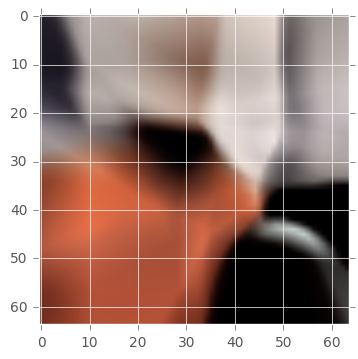

100 77.3115
101 80.8895
102 78.7125
103 78.9356
104 79.4737
105 77.6913
106 78.0412
107 76.478
108 75.0065
109 78.6662
110 77.8811
111 77.0872
112 79.8115
113 74.031
114 75.7289
115 74.2943
116 73.7841
117 78.1545
118 76.0753
119 79.7475


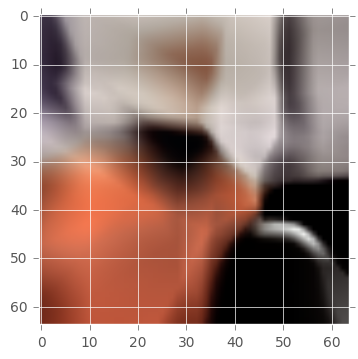

120 76.2419
121 77.7686
122 73.0145
123 79.4711
124 72.4387
125 76.4595
126 71.3578
127 73.9167
128 71.7694
129 71.2182
130 74.4828
131 69.8226
132 72.5578
133 74.0597
134 69.7294
135 72.4674
136 68.0287
137 71.4633
138 70.4908
139 70.0508


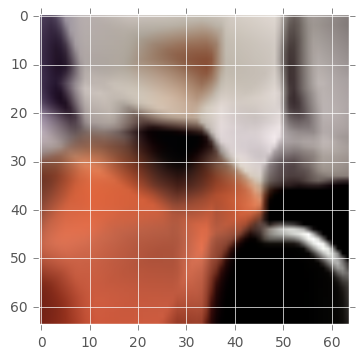

140 71.8369
141 72.1124
142 67.6039
143 69.2282
144 70.0312
145 70.3033
146 67.7739
147 72.0777
148 68.2
149 69.8456
150 66.3883
151 73.2561
152 69.1366
153 78.6649
154 69.096
155 63.5583
156 68.7338
157 69.6852
158 66.7497
159 71.5671


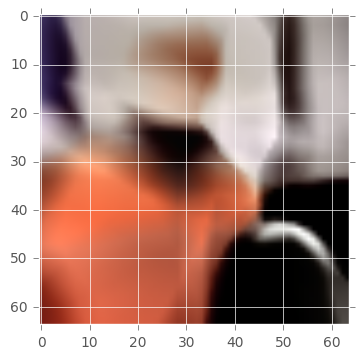

160 65.0957
161 65.9863
162 65.0343
163 67.9578
164 65.3419
165 64.5131
166 66.7391
167 84.3476
168 63.9207
169 63.3119
170 64.8153
171 64.7602
172 64.2565
173 65.4858
174 62.5976
175 64.2765
176 66.6786
177 66.214
178 65.3889
179 65.21


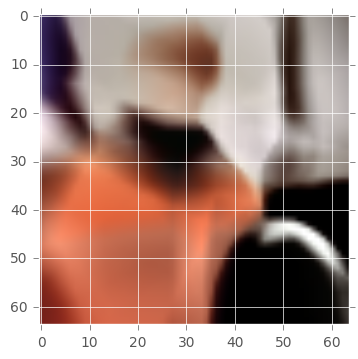

180 69.2
181 67.0482
182 62.5719
183 64.4368
184 60.3451
185 62.7705
186 61.4403
187 62.2735
188 66.395
189 64.1014
190 58.6732
191 59.6895
192 62.6676
193 64.5476
194 63.6431
195 63.7148
196 63.1002
197 62.5106
198 61.1733
199 62.2878


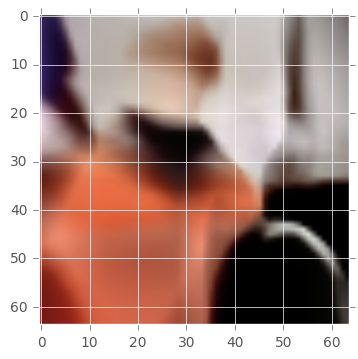

200 60.0794
201 62.2334
202 66.4848
203 60.5809
204 60.1264
205 60.307
206 62.2057
207 63.9747
208 61.5611
209 62.818
210 61.9423
211 58.1808
212 59.8846
213 60.965
214 62.0923
215 59.5346
216 57.9603
217 60.6347
218 60.6177
219 59.1437


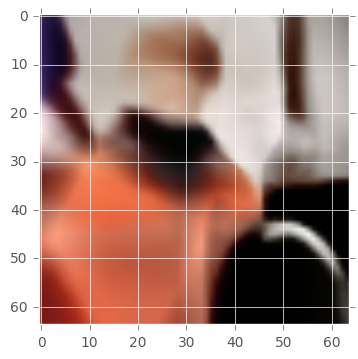

220 59.9344
221 62.2415
222 61.3705
223 61.8058
224 59.0938
225 59.7461
226 60.4801
227 57.4103
228 57.8192
229 58.9072
230 56.3696
231 61.7787
232 59.2199
233 61.4918
234 59.564
235 57.6681
236 58.5067
237 58.9892
238 57.0947
239 56.4093


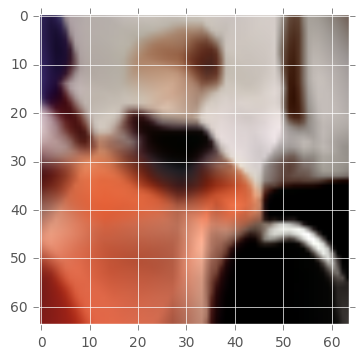

240 58.787
241 54.9264
242 56.6144
243 57.9928
244 56.8466
245 57.4372
246 56.6783
247 56.349
248 61.422
249 55.5261
250 65.9515
251 55.1032
252 54.5918
253 53.3066
254 58.0418
255 56.7732
256 60.0633
257 55.1858
258 53.9617
259 55.8761


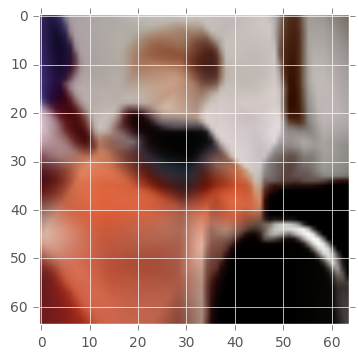

260 55.3532
261 56.11
262 54.8393
263 57.1875
264 53.0132
265 51.8011
266 58.3034
267 57.812
268 56.2933
269 61.2483
270 53.2773
271 54.0233
272 54.7032
273 53.5618
274 53.4582
275 53.3088
276 57.013
277 55.2496
278 53.5771
279 55.5271


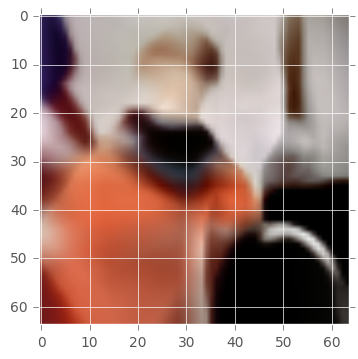

280 54.4122
281 57.4075
282 51.9014
283 52.9172
284 55.6572
285 51.5129
286 55.4652
287 53.0397
288 55.129
289 50.3249
290 53.405
291 53.2989
292 51.3035
293 53.4476
294 52.4722
295 52.059
296 50.2715
297 53.5309
298 51.6547
299 49.5889


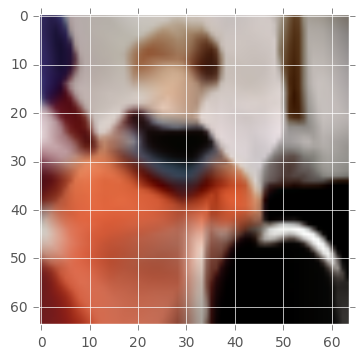

300 52.0494
301 53.411
302 49.8635
303 51.4358
304 52.0537
305 50.6864
306 55.2556
307 54.0464
308 52.1262
309 55.7054
310 50.5448
311 50.5324
312 50.7598
313 55.2558
314 55.5255
315 52.7413
316 52.5512
317 49.5462
318 52.1105
319 50.5125


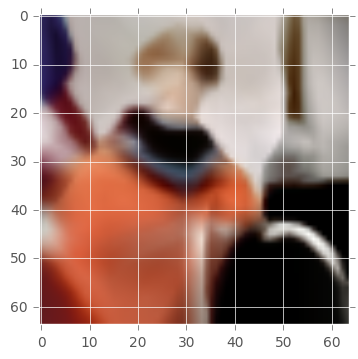

320 51.7637
321 50.6962
322 50.6194
323 48.0756
324 50.9933
325 51.0938
326 48.1666
327 51.1135
328 56.8241
329 51.7359
330 53.1925
331 51.4915
332 50.6997
333 51.0111
334 52.9361
335 50.0612
336 49.5187
337 48.6114
338 48.7155
339 48.8464


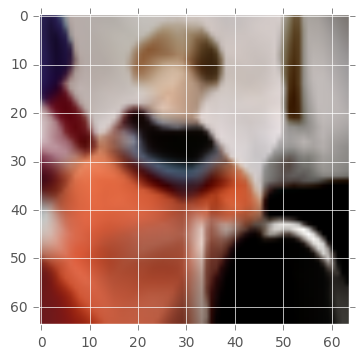

340 61.9848
341 47.5453
342 53.5046
343 49.4855
344 49.7168
345 55.1203
346 48.7842
347 49.2138
348 48.4049
349 47.215
350 47.7933
351 48.0406
352 52.1158
353 47.9575
354 48.8779
355 53.7782
356 49.6418
357 46.1969
358 47.2813
359 49.7744


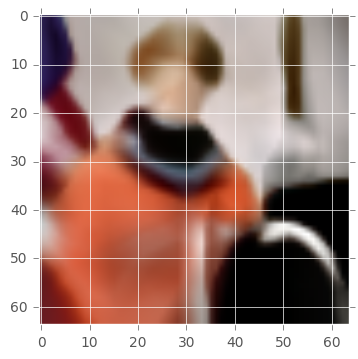

360 48.8064
361 47.3332
362 47.9562
363 45.8982
364 45.7958
365 47.4049
366 47.4968
367 48.9433
368 47.2692
369 50.7032
370 46.5695
371 46.8972
372 46.8062
373 53.1083
374 47.1547
375 46.5405
376 50.1447
377 46.4392
378 44.166
379 46.7412


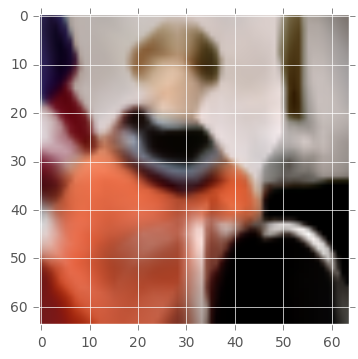

380 46.5449
381 47.2459
382 47.4254
383 47.2337
384 46.28
385 47.2466
386 44.6085
387 48.9817
388 49.6797
389 44.8584
390 46.0688
391 46.8173
392 47.2803
393 47.841
394 45.7075
395 44.6404
396 46.721
397 48.4303
398 46.8923
399 47.9342


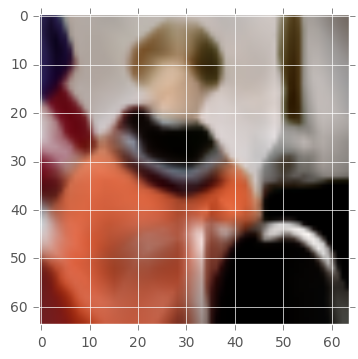

400 46.498
401 49.5971
402 46.2083
403 46.9656
404 44.2162
405 43.6478
406 46.4518
407 44.7455
408 44.6766
409 45.3986
410 45.508
411 45.3394
412 45.6772
413 46.8183
414 46.2788
415 45.0998
416 45.7218
417 45.536
418 46.7432
419 49.7399


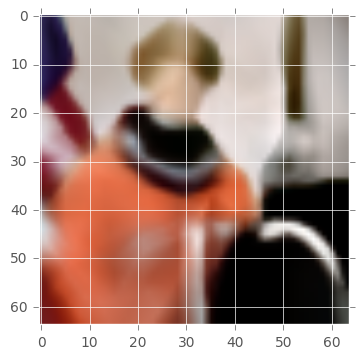

420 44.8551
421 49.0064
422 46.2786
423 44.033
424 47.4746
425 47.0646
426 47.9674
427 46.7611
428 45.9301
429 42.7992
430 45.6756
431 44.2138
432 46.6667
433 45.6758
434 42.8951
435 45.9009
436 47.4722
437 48.315
438 49.1161
439 44.8799


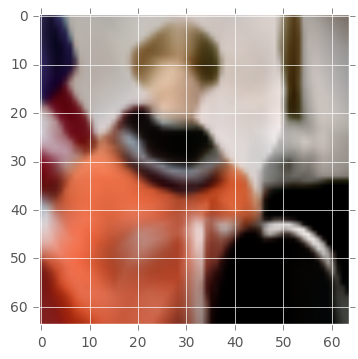

440 48.1689
441 47.2909
442 42.8848
443 44.1331
444 45.7864
445 43.1022
446 46.5632
447 44.8428
448 44.2321
449 43.8573
450 43.6291
451 45.1196
452 45.8728
453 43.3001
454 44.5109
455 41.9241
456 46.6764
457 46.0157
458 42.8228
459 44.8541


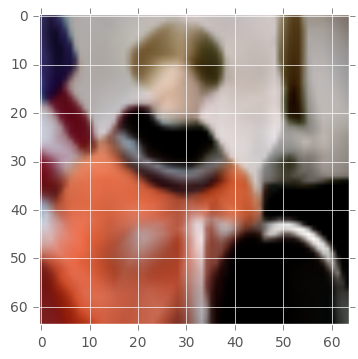

460 44.6504
461 45.9591
462 44.6093
463 42.4837
464 42.9561
465 45.4194
466 41.8672
467 45.8689
468 42.7971
469 44.7425
470 42.0252
471 45.7802
472 43.471
473 42.307
474 42.5243
475 41.7466
476 41.6544
477 42.2968
478 42.1469
479 42.2715


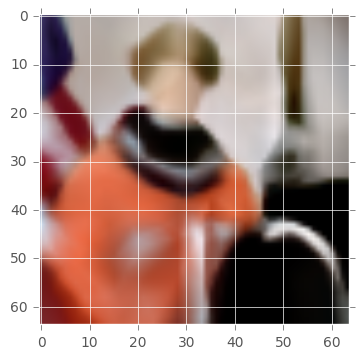

480 44.3515
481 41.6904
482 41.715
483 40.9799
484 43.7018
485 41.1392
486 41.4031
487 41.2101
488 42.9491
489 42.2786
490 43.3057
491 43.2316
492 50.9155
493 39.9372
494 43.1762
495 44.8417
496 43.3619
497 45.1441
498 41.225
499 42.866


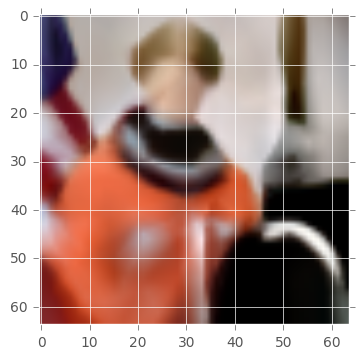

In [110]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

After letting this run for a few minutes, we'll see the image becoming more like the original image.

<a name="homework"></a>
# Homework:

Head over to the [notebook](session-2.ipynb) for more details.

<a name="reading"></a>
# Reading:

Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951. 

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society. 

Yann Lecun. Efficient BackProp. 1998.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.